-------------------------------
# **Make Labels**

In [1]:
p = ['L', 'R', 'F', 'B', 'S']
pp = ''
for n in range(0,5):
    for nn in range(n+1,5):
        strr = f'{p[n]}{p[nn]}'
        # add to the end of pp the f string strr
        pp += f'{strr}'

print(pp, '\n---------------')    

postures = []
for l in range(len(pp)):
    print(f'{pp[l]} -> ', end='')
    postures.append(pp[l])

print(pp[0])
postures.append(pp[0])

print(postures)

LRLFLBLSRFRBRSFBFSBS 
---------------
L -> R -> L -> F -> L -> B -> L -> S -> R -> F -> R -> B -> R -> S -> F -> B -> F -> S -> B -> S -> L
['L', 'R', 'L', 'F', 'L', 'B', 'L', 'S', 'R', 'F', 'R', 'B', 'R', 'S', 'F', 'B', 'F', 'S', 'B', 'S', 'L']


In [ ]:
# Run experiment
import os
import time 
time_of_beep = 1.68 # seconds 

st = time.time()
for it, posture in enumerate(postures):
    print(f'\r >>({it+1}/{(len(postures)+1)}) {posture}  | Elapsed time: {(time.time()-st):.2f} seconds', end='')
    
    os.system('afplay /System/Library/Sounds/Basso.aiff')    
    time.sleep(120 - time_of_beep)

os.system('afplay /System/Library/Sounds/Basso.aiff')    

------------------------------------
# **EDA**

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the dataset
file_path = '/Users/alexanderithakis/Downloads/Combined_Sensor_Data.csv'
file_path = '/Users/alexanderithakis/Downloads/Ezra Data (1).csv'
file_path = '(1) Dataset_1.csv'
data = pd.read_csv(file_path).drop(columns=['Unnamed: 0'])

# Display the first few rows of the dataset
data.head()

,Time (ms),Gyro X (rad/s),Gyro Y (rad/s),Gyro Z (rad/s),Accel X (m/s^2),Accel Y (m/s^2),Accel Z (m/s^2),Lin Accel X (m/s^2),Lin Accel Y (m/s^2),Lin Accel Z (m/s^2),Label
0,10,-0.036018,0.216549,-0.018232,-0.608908,-0.461178,-0.473462,0.254078,0.314109,-0.277810,T
1,20,-0.029164,0.210290,-0.025077,-0.617204,-0.473816,-0.467861,0.208072,0.180217,-0.240050,T
2,30,-0.014482,0.166597,-0.026896,-0.631393,-0.486925,-0.455408,-0.065781,-0.033864,-0.088844,T
3,40,-0.005110,0.103472,-0.024593,-0.641057,-0.490653,-0.447976,-0.373626,-0.145206,0.056746,T
4,50,-0.001757,0.049915,-0.017332,-0.640706,-0.489603,-0.446152,-0.460428,-0.154871,0.111250,T


---------------------
## **Z-score Based Outlier Detection**


In [42]:
# Initialize an empty DataFrame to store cleaned data
cleaned_data = pd.DataFrame()

# Set a threshold for identifying outliers
threshold = 2

# Iterate over each label
for label in data['Label'].unique():
    # Filter data for the current label
    label_data = data[data['Label'] == label]
    
    # Drop the label column for Z-score calculation
    label_data_sensors = label_data.drop(columns=['Label'])
    
    # Calculate the Z-score for each column
    z_scores = np.abs((label_data_sensors - label_data_sensors.mean()) / label_data_sensors.std())
    
    # Identify outliers
    outliers = (z_scores > threshold).any(axis=1)
    
    # Remove outliers
    cleaned_label_data = label_data[~outliers]
    
    # Append cleaned data to the final DataFrame
    cleaned_data = pd.concat([cleaned_data, cleaned_label_data])

# Display the cleaned data
# import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned Data", dataframe=cleaned_data)
cleaned_data.sample(n=10)

,Time (ms),Gyro X (rad/s),Gyro Y (rad/s),Gyro Z (rad/s),Accel X (m/s^2),Accel Y (m/s^2),Accel Z (m/s^2),Lin Accel X (m/s^2),Lin Accel Y (m/s^2),Lin Accel Z (m/s^2),Label,Cluster
149861,1498620,-0.005275,0.001836,-0.004282,-0.515477,-0.380908,-0.367775,-0.061449,0.002213,0.030378,R,2
134258,1342590,0.000246,0.009888,0.004326,-0.619938,-0.594706,-0.274114,-0.058340,0.002244,0.021797,B,2
219715,2197160,-0.024956,0.020582,0.013270,-0.616880,-0.546850,-0.324723,-0.027876,-0.017985,0.016313,B,1
183026,1830270,0.006004,0.002588,0.002431,-0.730764,-0.717764,-0.633673,-0.034456,-0.030442,0.023931,B,4
10656,106570,-0.001583,-0.000587,-0.001071,-0.648834,-0.486525,-0.590160,-0.018724,-0.016473,0.009502,L,3
92680,926810,0.000136,0.004960,-0.007095,-0.554819,-0.434503,-0.345525,-0.008854,0.034377,-0.007199,S,5
213805,2138060,-0.008151,0.015466,-0.016603,-0.669861,-0.524243,-0.597270,-0.070197,-0.009892,-0.021535,S,1
241339,2413400,-0.064220,0.116692,0.029378,-0.699080,-0.625281,-0.784972,0.041532,-0.033788,0.100195,L,1
98607,986080,0.000598,0.007947,-0.001387,-0.528514,-0.367479,-0.420596,-0.018188,0.026698,0.034325,R,5
131059,1310600,-0.004063,0.013305,-0.005026,-0.452134,-0.364067,-0.312574,0.015591,0.008025,0.029039,R,2


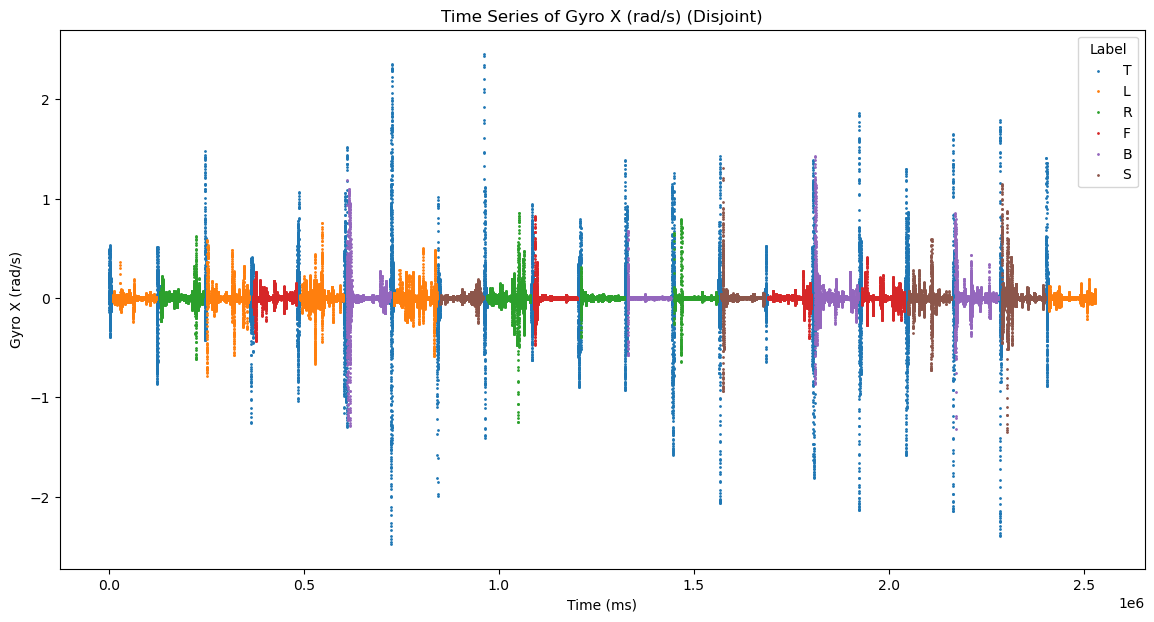

In [44]:
import matplotlib.pyplot as plt

_data = data.copy(deep=True)
# _data = cleaned_data.copy(deep=True)    

def plot_sensor_data_disjoint(sensor_column):
    plt.figure(figsize=(14, 7))
    for label in _data['Label'].unique():
        subset = _data[_data['Label'] == label]
        plt.scatter(subset['Time (ms)'], subset[sensor_column], label=label, s=1)
    
    plt.title(f'Time Series of {sensor_column} (Disjoint)')
    plt.xlabel('Time (ms)')
    plt.ylabel(sensor_column)
    plt.legend(title='Label')
    plt.show()



# Plotting the sensor data for each column
sensor_columns = ['Gyro X (rad/s)', 'Gyro Y (rad/s)', 'Gyro Z (rad/s)', 
                  'Accel X (m/s^2)', 'Accel Y (m/s^2)', 'Accel Z (m/s^2)', 
                  'Lin Accel X (m/s^2)', 'Lin Accel Y (m/s^2)', 'Lin Accel Z (m/s^2)']

# Plotting the sensor data for each column without connecting the lines
for sensor_column in sensor_columns:
    plot_sensor_data_disjoint(sensor_column) ; break

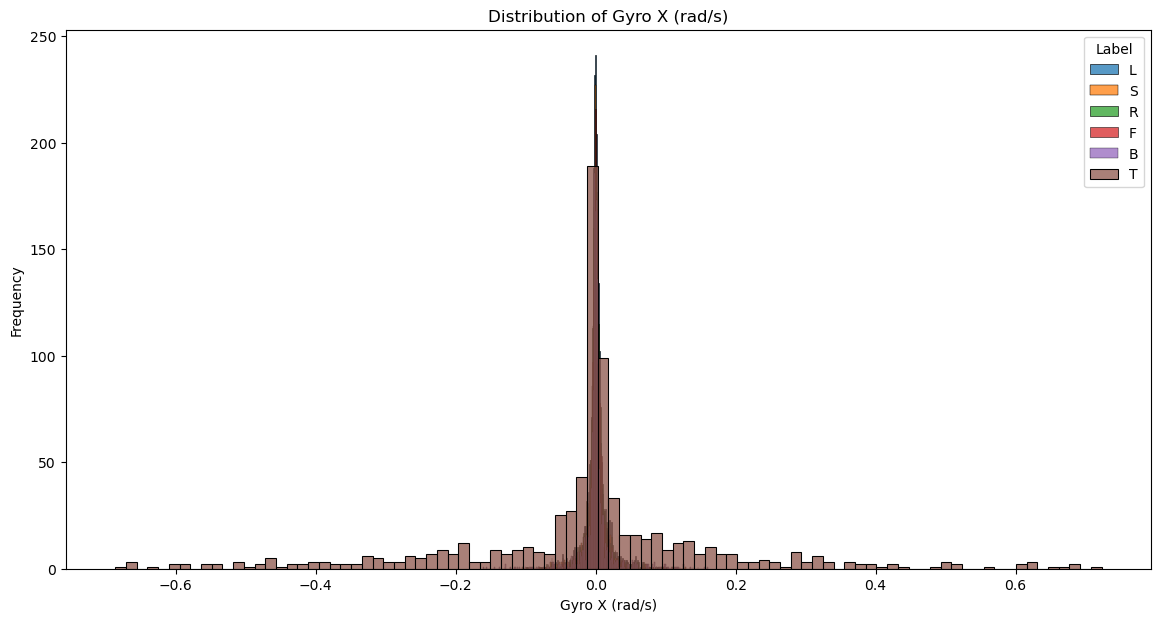

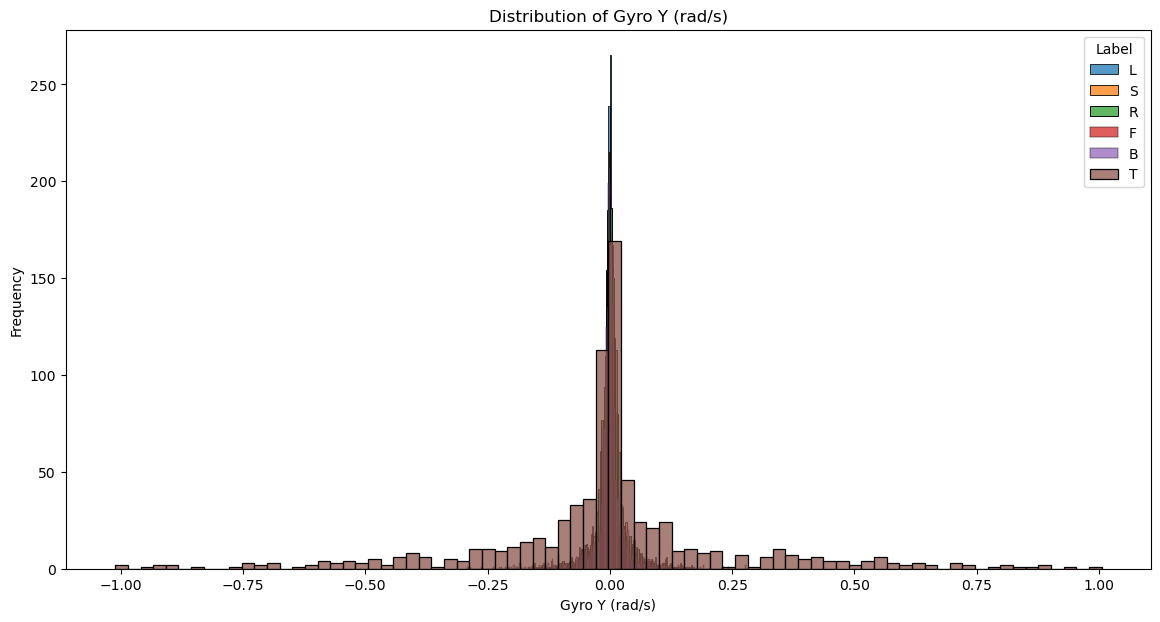

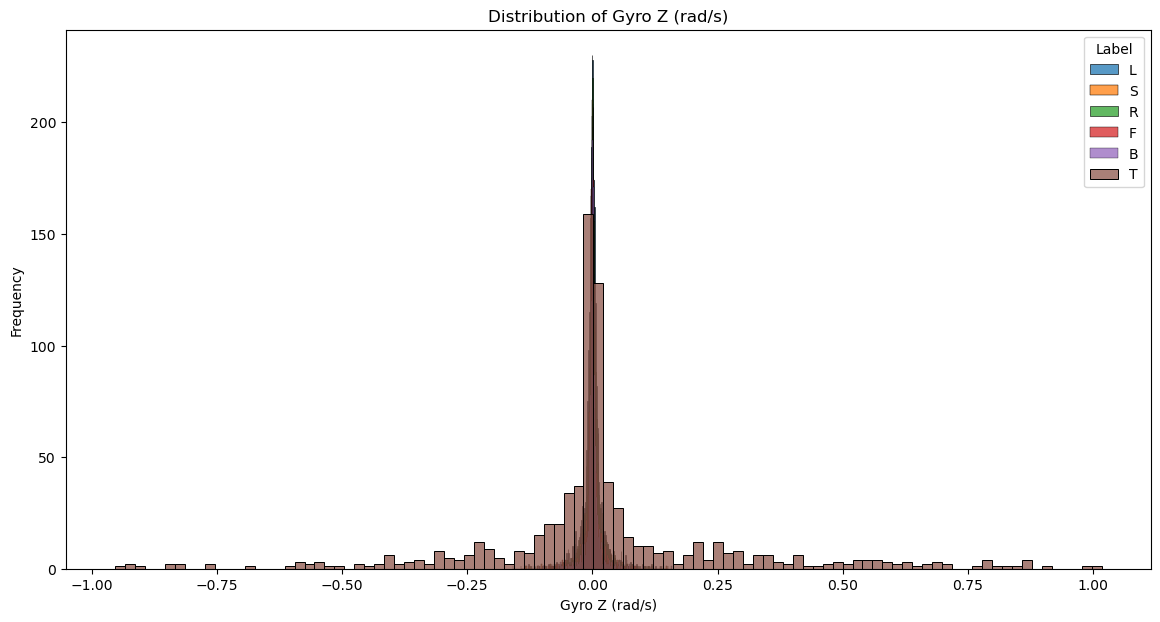

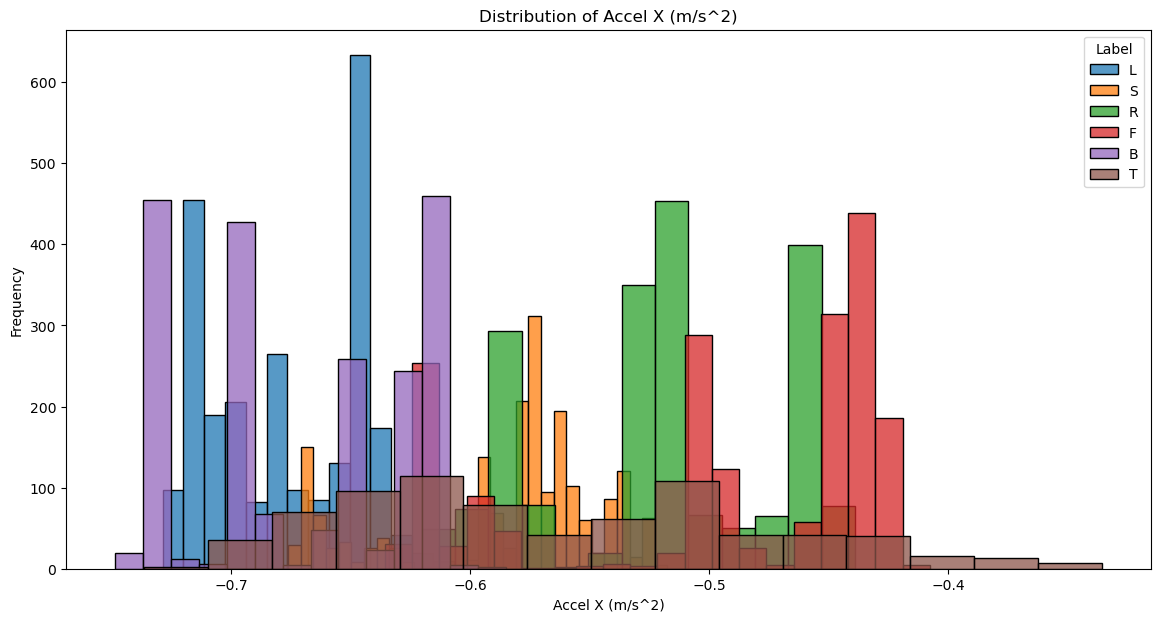

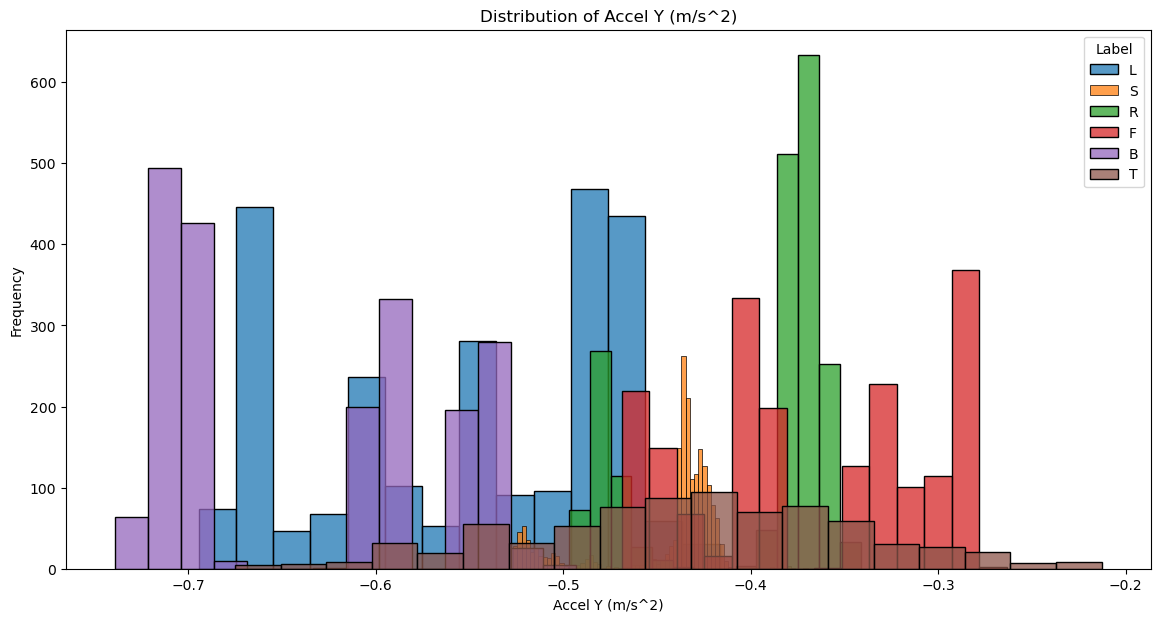

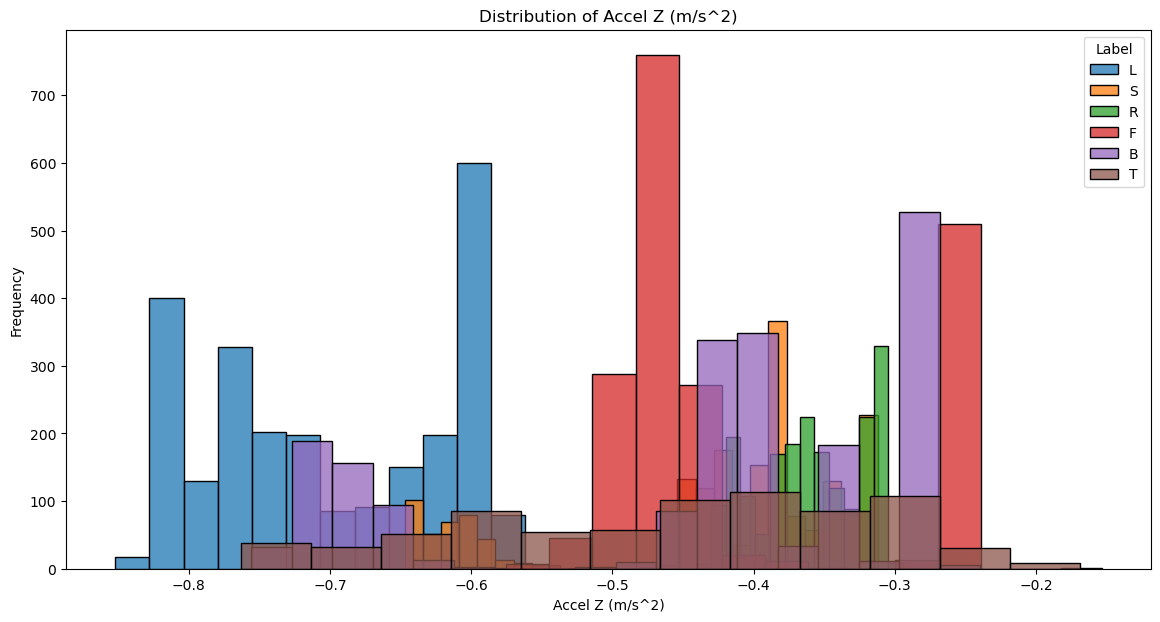

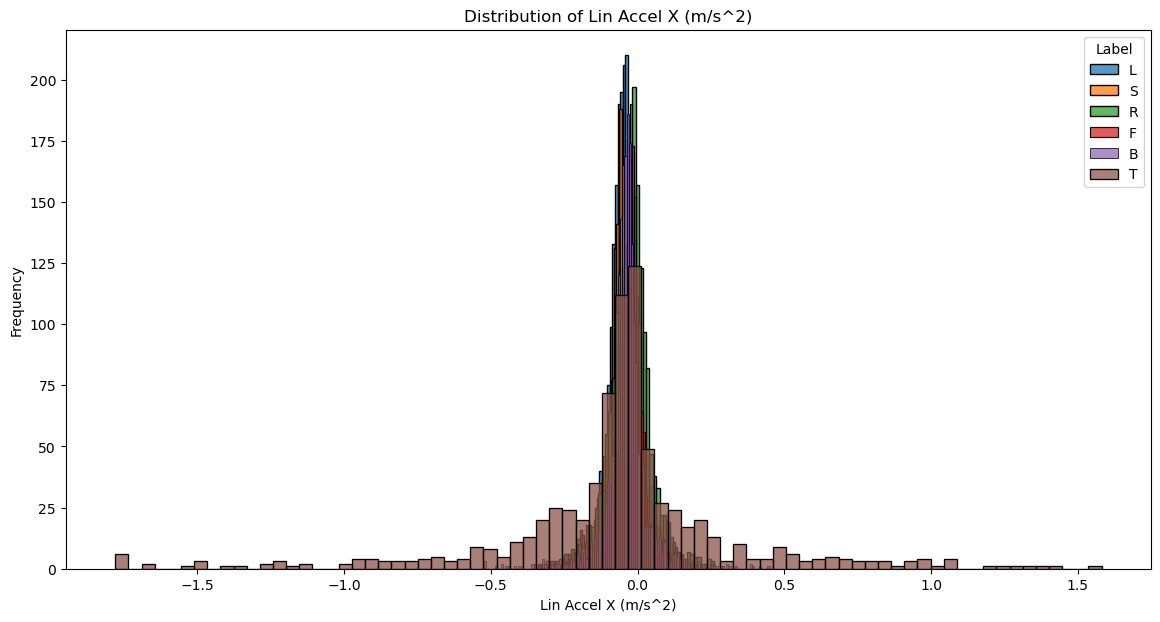

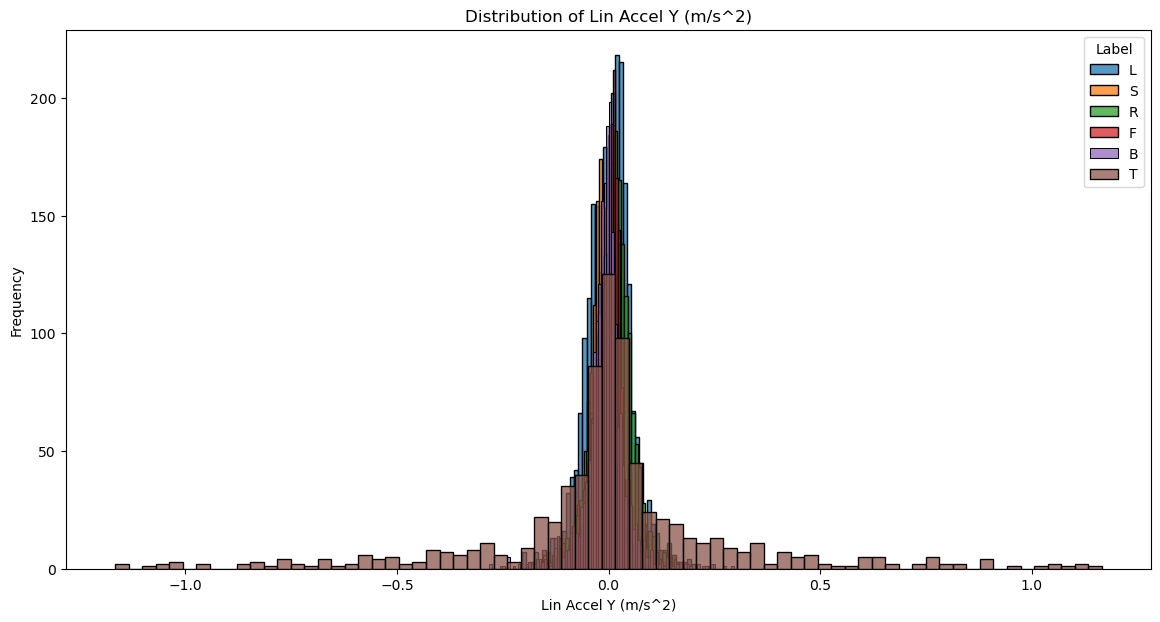

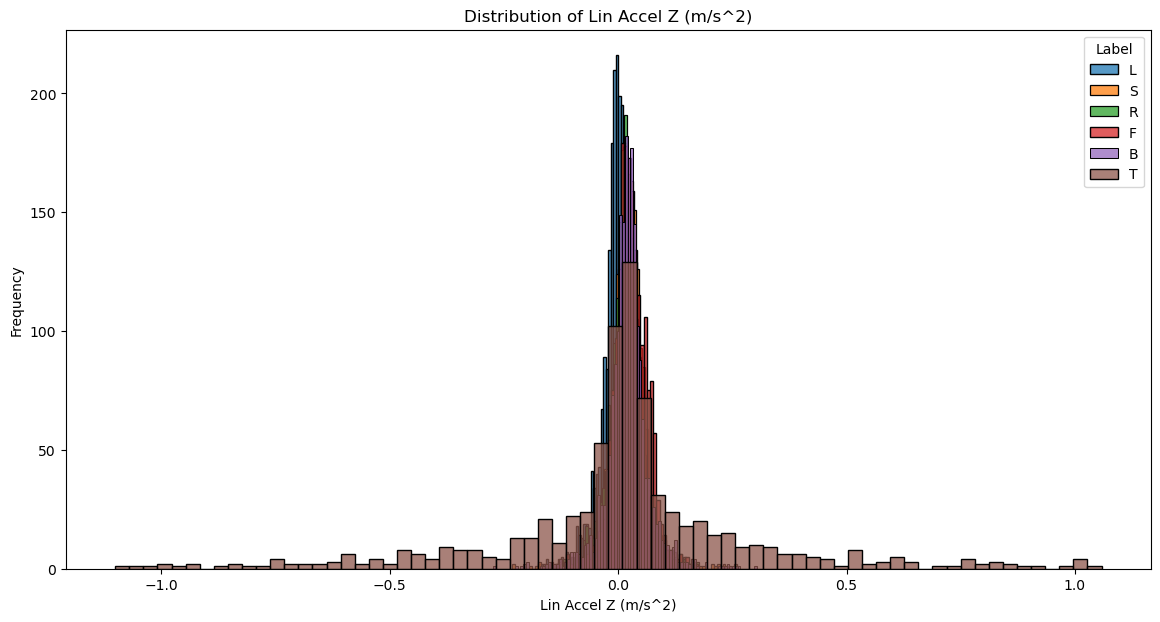

In [36]:
import seaborn as sns

def plot_sensor_data_distribution(sensor_column):
    plt.figure(figsize=(14, 7))
    for label in _data['Label'].unique():
        subset = _data[_data['Label'] == label]
        sns.histplot(data=subset, x=sensor_column, label=label, kde=False)
    
    plt.title(f'Distribution of {sensor_column}')
    plt.xlabel(sensor_column)
    plt.ylabel('Frequency')
    plt.legend(title='Label')
    plt.show()

# Plotting the sensor data distribution for each column
for sensor_column in sensor_columns:
    plot_sensor_data_distribution(sensor_column)

In [4]:
# Selecting relevant features for t-SNE
_data = data.sample(frac=.05)
_data = cleaned_data.sample(frac=.05)

features = _data.drop(columns=['Time (ms)', 'Label'])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42, verbose=1, n_jobs=-1)
tsne_results = tsne.fit_transform(scaled_features)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Display the t-SNE results
# import ace_tools as tools; tools.display_dataframe_to_user(name="t-SNE Results", dataframe=tsne_df)

tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11120 samples in 0.006s...
[t-SNE] Computed neighbors for 11120 samples in 0.515s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11120
[t-SNE] Computed conditional probabilities for sample 2000 / 11120
[t-SNE] Computed conditional probabilities for sample 3000 / 11120
[t-SNE] Computed conditional probabilities for sample 4000 / 11120
[t-SNE] Computed conditional probabilities for sample 5000 / 11120
[t-SNE] Computed conditional probabilities for sample 6000 / 11120
[t-SNE] Computed conditional probabilities for sample 7000 / 11120
[t-SNE] Computed conditional probabilities for sample 8000 / 11120
[t-SNE] Computed conditional probabilities for sample 9000 / 11120
[t-SNE] Computed conditional probabilities for sample 10000 / 11120
[t-SNE] Computed conditional probabilities for sample 11000 / 11120
[t-SNE] Computed conditional probabilities for sample 11120 / 11120
[t-SNE] Mean sigma: 0.164136
[t-SNE] KL divergence

,TSNE1,TSNE2
0,-55.354942,14.805174
1,-1.609385,52.975536
2,14.568925,21.181067
3,64.852768,5.086583
4,-47.627640,46.035030


In [5]:
data_tsne = tsne_df.copy(deep=True)
data_tsne['Label'] = _data['Label'].values
data_tsne = data_tsne.query('Label != "T"')

# Make colors for each label
colors = {
    'L': 'red',
    'R': 'blue',
    'F': 'green',
    'B': 'purple',
    'S': 'orange'
}
fig = px.scatter(data_tsne, x='TSNE1', y='TSNE2', color='Label', color_discrete_map=colors, title='t-SNE Results')
fig.update_layout(title='t-SNE Results', xaxis_title='TSNE1', yaxis_title='TSNE2')
# make the plot size square
fig.update_layout(width=1200, height=1000)

fig.show()

----------------------------------
# **K-Means - Clustering** 

In [45]:
from sklearn.cluster import KMeans

# Separate features and labels
features = data.drop(columns=['Label'])
labels = data['Label']

# Perform K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Calculate the percentage of labels in each cluster
label_counts = data.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)
label_percentages = label_counts.div(label_counts.sum(axis=1), axis=0) * 100

# add to the last row the sum of the columns
label_percentages = label_percentages.T
label_percentages.loc['Total'] = label_percentages.sum()

label_percentages.style.background_gradient(cmap='cividis', axis=0)

/Users/alexanderithakis/miniforge3/envs/MLQS/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster,0,1,2,3,4,5
Label,,,,,,
B,25.868354,26.251104,26.286861,0.000000,26.310125,0.000000
F,12.259248,0.000000,0.688238,13.525136,51.931402,26.108421
L,51.736707,28.637568,0.000000,51.417487,0.000000,0.000000
R,0.000000,0.000000,37.179181,25.708743,0.000000,41.398462
S,0.729017,37.951937,26.286861,0.000000,14.582985,25.372638
T,9.406674,7.159392,9.558859,9.348634,7.175489,7.120478
Total,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


----------------------------------
# **Prediction - Flaml** 

In [38]:
# Importing the necessary libraries for the task
from flaml import AutoML
from sklearn.model_selection import train_test_split

# Prepare the data
# Dropping the unnamed column and the time column for prediction
_data = data.copy(deep=True)
_data = cleaned_data.copy(deep=True)

X = _data.drop(columns=['Time (ms)', 'Label'])
y = _data['Label']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AutoML
automl = AutoML()

# Define the settings for FLAML
settings = {
    "time_budget": 5*60,  # time budget in seconds
    "metric": 'accuracy',  # primary metric to optimize
    "task": 'classification',  # type of task
    "log_file_name": 'flaml.log',  # flaml log file
    "estimator_list": ['lgbm'],  # list of estimators
    "eval_method": 'cv',  # cross-validation method
    "n_splits": 5,  # number of folds for cross-validation

    # skip preprocessing
    "skip_transform": True
}

# Train the model
automl.fit(X_train, y_train, **settings)

# Evaluate the model
from sklearn.metrics import classification_report

# Get predictions
y_pred = automl.predict(X_test)

[flaml.automl.logger: 06-08 14:08:59] {1680} INFO - task = classification
[flaml.automl.logger: 06-08 14:08:59] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 06-08 14:08:59] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 06-08 14:08:59] {1901} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 06-08 14:08:59] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-08 14:09:00] {2345} INFO - Estimated sufficient time budget=13109s. Estimated necessary time budget=13s.
[flaml.automl.logger: 06-08 14:09:00] {2392} INFO -  at 1.5s,	estimator lgbm's best error=0.1203,	best estimator lgbm's best error=0.1203
[flaml.automl.logger: 06-08 14:09:00] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-08 14:09:02] {2392} INFO -  at 2.8s,	estimator lgbm's best error=0.1203,	best estimator lgbm's best error=0.1203
[flaml.automl.logger: 06-08 14:09:02] {2219} INFO - iteration 2, current learner lgbm
[fla

In [31]:
pd.DataFrame(classification_report(y_test, y_pred, digits=4, output_dict=True)).T

,precision,recall,f1-score,support
B,0.986652,0.996181,0.991394,8904.000000
F,0.992296,0.998652,0.995463,8899.000000
L,0.992918,0.997029,0.994969,11109.000000
R,0.984965,0.997139,0.991015,8738.000000
S,0.994186,0.995775,0.994980,8758.000000
T,0.966761,0.895038,0.929518,4192.000000
accuracy,0.988518,0.988518,0.988518,0.988518
macro avg,0.986296,0.979969,0.982890,50600.000000
weighted avg,0.988385,0.988518,0.988324,50600.000000
